# Naive Bayes: Diabetes Prediction

Easy-to-understand Naive Bayes model to predict diabetes with minimal code.

In [21]:
# Import simple libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

## Load Data

In [22]:
# Load diabetes dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

print(f"Dataset size: {df.shape[0]} patients")
print(f"Features: {df.shape[1]-1}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nDiabetes cases: {df['Outcome'].sum()} out of {len(df)} ({df['Outcome'].mean():.1%})")

Dataset size: 768 patients
Features: 8

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  

Diabetes cases: 268 out of 768 (34.9%)


## Prepare Data

In [23]:
# Separate features and target
X = df.drop('Outcome', axis=1)  # Features (all columns except Outcome)
y = df['Outcome']               # Target (0=No Diabetes, 1=Diabetes)

print(f"Features (X): {list(X.columns)}")
print(f"Target (y): 0=No Diabetes, 1=Diabetes")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data: {len(X_train)} patients")
print(f"Testing data: {len(X_test)} patients")

Features (X): ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']
Target (y): 0=No Diabetes, 1=Diabetes

Training data: 614 patients
Testing data: 154 patients


## Train Naive Bayes Models

In [24]:
# Create and train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=" * 40)
print("NAIVE BAYES RESULTS")
print("=" * 40)
print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"F1-Score: {f1:.3f}")

if accuracy > 0.75:
    print("✅ Good performance!")
else:
    print("⚠️ Could be better")

NAIVE BAYES RESULTS
Accuracy: 0.766 (76.6%)
F1-Score: 0.684
✅ Good performance!


## Detailed Results

In [25]:
# Show detailed results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"Actual    No Diabetes  Diabetes")
print(f"No Diabetes    {cm[0,0]:3d}        {cm[0,1]:3d}")
print(f"Diabetes       {cm[1,0]:3d}        {cm[1,1]:3d}")

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.83      0.80      0.81        99
    Diabetes       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Confusion Matrix:
                 Predicted
Actual    No Diabetes  Diabetes
No Diabetes     79         20
Diabetes        16         39


## Visualizations

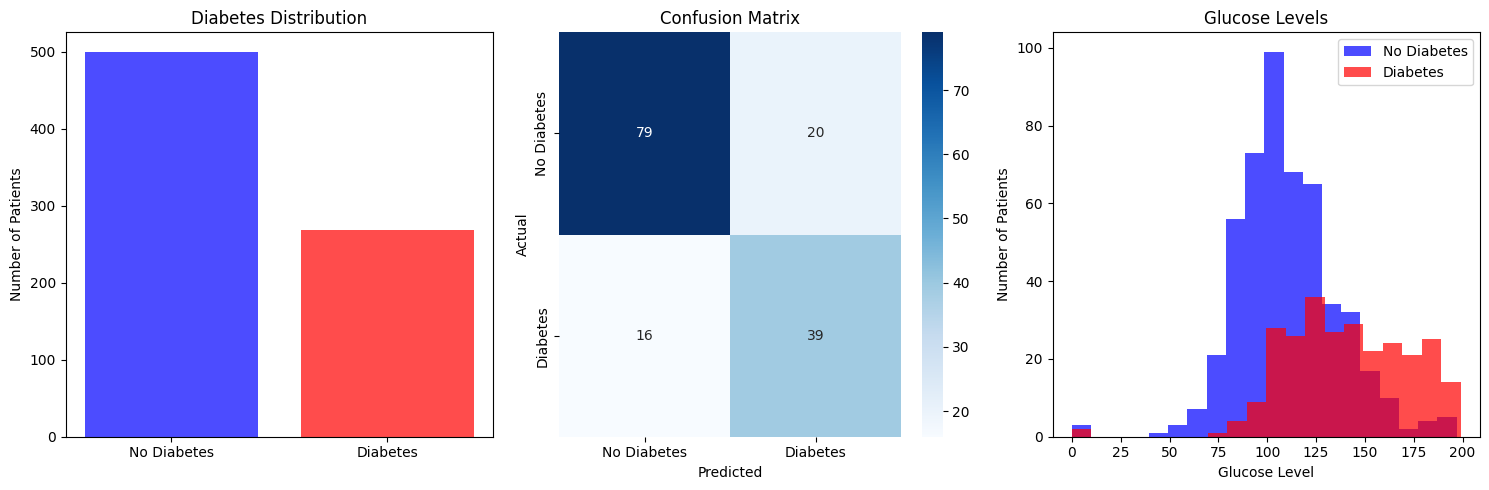

In [26]:
# Create simple visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Diabetes distribution
diabetes_counts = df['Outcome'].value_counts()
axes[0].bar(['No Diabetes', 'Diabetes'], diabetes_counts.values, color=['blue', 'red'], alpha=0.7)
axes[0].set_title('Diabetes Distribution')
axes[0].set_ylabel('Number of Patients')

# 2. Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[1].set_title('Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# 3. Glucose levels by diabetes status
no_diabetes = df[df['Outcome'] == 0]['Glucose']
diabetes = df[df['Outcome'] == 1]['Glucose']

axes[2].hist(no_diabetes, bins=20, alpha=0.7, label='No Diabetes', color='blue')
axes[2].hist(diabetes, bins=20, alpha=0.7, label='Diabetes', color='red')
axes[2].set_title('Glucose Levels')
axes[2].set_xlabel('Glucose Level')
axes[2].set_ylabel('Number of Patients')
axes[2].legend()

plt.tight_layout()
plt.show()

## Test with New Patients

In [27]:
# Test model with example patients
print("=" * 50)
print("TESTING WITH NEW PATIENTS")
print("=" * 50)

# Create example patients
new_patients = pd.DataFrame({
    'Pregnancies': [2, 0, 8],
    'Glucose': [100, 180, 150],
    'BloodPressure': [70, 90, 85],
    'SkinThickness': [20, 35, 30],
    'Insulin': [80, 200, 150],
    'BMI': [25.0, 35.0, 32.0],
    'DiabetesPedigree': [0.3, 1.2, 0.8],
    'Age': [30, 50, 45]
})

# Make predictions
predictions = model.predict(new_patients)
probabilities = model.predict_proba(new_patients)

# Show results
patient_names = ['Young Healthy', 'High Risk', 'Middle-aged']

for i in range(len(new_patients)):
    result = "Diabetes" if predictions[i] == 1 else "No Diabetes"
    confidence = max(probabilities[i]) * 100
    
    print(f"\nPatient {i+1} ({patient_names[i]}):")
    print(f"  Age: {new_patients.iloc[i]['Age']}, Glucose: {new_patients.iloc[i]['Glucose']}, BMI: {new_patients.iloc[i]['BMI']}")
    print(f"  Prediction: {result}")
    print(f"  Confidence: {confidence:.1f}%")

TESTING WITH NEW PATIENTS

Patient 1 (Young Healthy):
  Age: 30.0, Glucose: 100.0, BMI: 25.0
  Prediction: No Diabetes
  Confidence: 97.8%

Patient 2 (High Risk):
  Age: 50.0, Glucose: 180.0, BMI: 35.0
  Prediction: Diabetes
  Confidence: 99.0%

Patient 3 (Middle-aged):
  Age: 45.0, Glucose: 150.0, BMI: 32.0
  Prediction: Diabetes
  Confidence: 85.6%


## Summary

In [29]:
print("=" * 50)
print("SIMPLE NAIVE BAYES SUMMARY")
print("=" * 50)
print(f"📊 Dataset: {len(df)} patients")
print(f"🎯 Algorithm: Gaussian Naive Bayes")
print(f"📈 Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"📈 F1-Score: {f1:.3f}")


SIMPLE NAIVE BAYES SUMMARY
📊 Dataset: 768 patients
🎯 Algorithm: Gaussian Naive Bayes
📈 Accuracy: 0.766 (76.6%)
📈 F1-Score: 0.684
